Procesamiento de Lenguaje Natural
==================

Práctica
=======

In [59]:
import pandas as pd
%matplotlib inline
from sklearn.datasets import fetch_20newsgroups as news

seed = 24

news_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=seed)

### Vamos a indagar un poco sobre los datos

In [53]:
news_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
len(news_train.data)

11314

In [63]:
print("\n".join(news_train.data[0].split("\n")))

From: HOLFELTZ@LSTC2VM.stortek.com
Subject: Re: Need a book
Organization: StorageTek SW Engineering
Lines: 37

In article <Apr.14.03.08.18.1993.5458@athos.rutgers.edu>
bassili@cs.arizona.edu (Amgad Z. Bassili) writes:
 
>
>I appreciate if anyone can point out some good books about the dead sea
>scrolls of Qumran. Thanks in advance.
>
>Please reply by e-mail at <bassili@cs.arizona.edu>
 
Ok boys & girls, hang on; here we go!
 
   Christ's Eternal Gospel               Robinson & Robinson
   The Dead Sea Scrolls & the NT         WS LaSor
   James the Just in Habakkuk Pesher     RH Eisenman
   Maccabees ... Quamran                 RH Eisenman
   Dead Sea Scrolls Uncovered            Eisenman & Wise
   Dead Sea Scrolls Deception            Baigent & Leigh
   Jesus & Riddle of Dead Sea Scrolls    B Thiering
   Jesus Scroll                          D Joyce
 
Happy Reading & welcome aboard
 
 
A poor Wayfaring Stranger [some say, a Strange One] in a strange land,
 
 +--------------------------

In [15]:
print(news_train.target_names[news_train.target[0]])

soc.religion.christian


In [18]:
news_train.target[:10]

array([15, 11,  3,  2, 13, 10, 13,  0, 18, 16])

In [26]:
df = pd.DataFrame({'content': news_train.data, 'target': news_train.target })

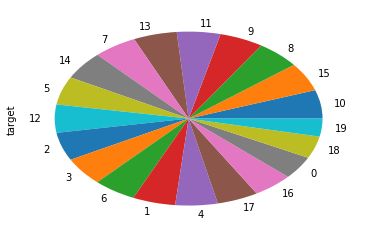

In [60]:
df.target.value_counts().plot.pie()

## Bag of words

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

from nltk.corpus import stopwords

In [61]:
count_vect = CountVectorizer(tokenizer=word_tokenize, stop_words='english')
X_train_counts = count_vect.fit_transform(news_train.data)
X_train_counts.shape

(11314, 185984)

In [79]:
pd.Series(count_vect.get_feature_names()).sample(5)

124902    mountain
162717      sysops
106843       jpegs
179851       x10th
180350      xandor
dtype: object

## Construcción de un clasificador utilizando regresión logística

In [46]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_counts, df.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
pred = logistic.predict(X_new_counts)

for doc, category in zip(docs_new, pred):
    print('%r => %s' % (doc, news_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => talk.politics.guns


## Construcción de un clasificador utilizando Naïve Bayes

<img src="http://www.cs.cornell.edu/courses/cs4780/2015fa/web/projects/03NaiveBayes/nb.png" width="300px"/>
<img src="http://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png" width="300px" />

In [51]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, df.target)
pred = clf.predict(X_new_counts)

for doc, category in zip(docs_new, pred):
    print('%r => %s' % (doc, news_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics
